In [ ]:
!pip install opencv-python

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


TypeError: ignored

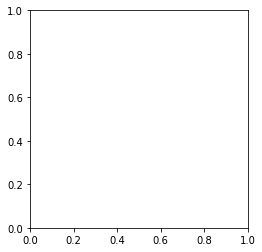

In [ ]:
image = cv2.imread("melanoma.jpeg",cv2.IMREAD_GRAYSCALE)
plt.imshow(image,cmap='gray')
plt.show()
image.shape

In [ ]:
class sequential(): 
  def __init__(self,):
    self.output_shape = ()
    self.Graph = []
  def add(self,Object):
    self.Graph.append(Object)
    print(self.Graph)
    self.output_shape =  Object.output_shape(    num_filters = Object.num_filters ,
                                                 filter_size = Object.filter_size ,
                                                 input_shape = Object.input_shape 
                                                 ) 
   
  def cnn(self,num_filters,filter_size,input_shape = None):
    if(input_shape == None):
      if(len(self.Graph)== 0):
        raise("the operations graph in empty")
      else:
        temp = cnn(input_shape = self.output_shape,num_filters = num_filters,filter_size = filter_size)
    else:
      temp = cnn(input_shape = input_shape,num_filters = num_filters,filter_size = filter_size)
    return temp
  def max_pool(self,num_filters,filter_size,input_shape = None):
    if(input_shape == None):
      if(len(self.Graph)== 0):
        raise ValueError("the operations graph in empty")
      else:
        temp = maxPool(self.output_shape,filter_size)
    else:
      temp = maxPool(input_shape,filter_size)
    return temp
  def forawrdProp(self,image):
   image = image
   for i in self.Graph:
      image = i.forwardProp(image)
   self.out = image
   return self.out 
  def dense(self,output_size,input_shape = None):
    if(input_shape == None):
      if(len(self.Graph)== 0):
        raise("the operations graph in empty")
      else:
        temp = dense(self.output_shape,output_size)
    else:
      temp = dense(input_shape,output_size)
    return temp
  def backProp(self,input_,lable,learn_rate):
      self.forawrdProp(input_)
      delta = self.Graph[-1].backProp(lable = lable,learn_rate=learn_rate)
      for i in range(2,len(self.Graph)+1):
        delta = self.Graph[-i].backProp(gradient = delta,learn_rate = learn_rate)
      print("back propagation successfull ")
      return True
  def fit(self,input_,lable,batch_size,learn_rate,epochs):
    for l in range(epochs):
      print("epoch {}".format(l))
      for k,(i,j) in enumerate(zip(input_,lable)): 
        print(k)
        self.backProp(input_=i,lable = j,learn_rate = learn_rate)
        if((k+1) % batch_size == 0):
          self.update()
      self.update()
    return True  

  def update(self): 
    for i in self.Graph:
      i.update()
    return True


In [ ]:
class cnn():
  def __init__(self,input_shape,num_filters,filter_size):
    self.num_filters = num_filters
    self.filter_size = filter_size
    self.input_shape = input_shape
    self.conv_filters = np.random.randn(num_filters,filter_size,filter_size)/(filter_size*filter_size)
    self.dl_d_filter = None
    self.is_updated =False
  def forwardProp(self,image):
    height, width = image.shape
    self.conv_out= np.zeros((self.num_filters,(height - self.filter_size + 1) ,(width - self.filter_size + 1 )))
    for image_patch,j,i in self.image_region(image):
      for k in range(self.num_filters):
        """if (np.sum(image_patch * self.conv_filters[k] ,axis=(0,1))<0) : 
          self.conv_out[k,j,i] = 0
        else: """
        self.conv_out[k,j,i] = np.sum(image_patch * self.conv_filters[k] ,axis=(0,1))
    """ for i in range(self.num_filters):
      plt.imshow(self.conv_out[i,:,:],cmap='gray')
      plt.show()  """  

    return self.conv_out
  def image_region(self,image,filter_=None):
    if filter_ is None:
      filter_size = self.filter_size
    else:
      filter_size = filter_.shape[1]
    self.image = image
    hight,width = image.shape
    for i in range(hight- filter_size+1):
      for j in range(width-filter_size+1):
        image_patch = image[i:(i+filter_size),j:(j+filter_size)]
        yield image_patch,i,j
  def output_shape(self,input_shape,filter_size,num_filters):
    if(len(input_shape) == 2):
      return (num_filters,(input_shape[-2]-filter_size + 1 ),(input_shape[-1]-filter_size+1))
    elif(len(input_shape) == 3):
      return (num_filters * input_shape[0],(input_shape[-2]-filter_size+1),(input_shape[-1]-filter_size+1))
    """ def backProp(self,gradient,learn_rate):
    self.dl_dout = np.zeros(self.input_shape)
    self.dl_d_filter = np.zeros(self.conv_filters.shape)
    for image_patch,j,i in self.image_region(image,gradient):
      for k in range(self.num_filters):
        self.dl_d_filter[k,i,j] = np.sum(image_patch*gradient[k] ,axis = (0,1) )  
      
    self.conv_filters = np.array([f-learn_rate*(nf/np.amax(nf,axis=(0,1))) for f,nf in zip(self.conv_filters,self.dl_d_filter)])
   for k in range(self.num_filters):
      self.conv_filters = self.conv_filters/np.amax(self.conv_filters,axis=(0,1))"""

  def backProp(self,gradient,learn_rate):
    self.dl_dout = np.zeros(self.input_shape)
    if self.dl_d_filter is None:
      self.dl_d_filter = np.zeros(self.conv_filters.shape)
    elif self.is_updated :
        self.dl_d_filter = np.zeros(self.conv_filters.shape)
        self.is_updated = False
    for image_patch,j,i in self.image_region(self.image,gradient):
      for k in range(self.num_filters):
        self.dl_d_filter[k,i,j] += np.sum(image_patch*gradient[k] ,axis = (0,1) )  * learn_rate
   
    print(self.dl_d_filter)
    ### compute Dl_Dout

    return   self.dl_dout
  
  
  def update(self):
    self.conv_filters = np.array([f-nf for f,nf in zip(self.conv_filters,self.dl_d_filter)])
    self.is_updated = True
    return   

In [ ]:
class maxPool():
  def __init__(self,input_shape,filter_size):
    self.filter_size = filter_size
    self.num_filters = input_shape[0]
    self.input_shape = input_shape
  def output_shape(self,input_shape,filter_size,num_filters):
      return (num_filters ,(input_shape[-2]//filter_size ),(input_shape[-1]//filter_size))
  def image_region(self,image):
    self.image = image
    hight = image.shape[1]//self.filter_size
    width = image.shape[2]//self.filter_size
    for k in range(self.num_filters):
      for i in range(hight):
        for j in range(width):
          image_patch = image[k,(i*self.filter_size):(i*self.filter_size+self.filter_size),(j*self.filter_size):(j*self.filter_size+self.filter_size)]
          yield image_patch,k,i,j
  def forwardProp(self,image):
    num_filters,hight,width= image.shape
    self.output = np.zeros((num_filters,hight // self.filter_size, width // self.filter_size  ))
    for image_patch,k,i,j in self.image_region(image):
      self.output[k][i][j] = np.amax(image_patch,axis=(0,1))
    return self.output
  def backProp(self,gradient,learn_rate):
    self.dl_dout = np.zeros(self.image.shape)
    for image_patch,k,i,j in self.image_region(self.image):
      hight,width = image_patch.shape
      max_val = np.amax(image_patch,axis=(0,1))
      for i1 in range(hight):
        for j1 in range(width):
          if(max_val == image_patch[i1,j1]):
            
            self.dl_dout[k,i*self.filter_size+i1,j*self.filter_size+j1] = gradient[k,i,j]
    
    return self.dl_dout  
  
  def update(self):
    pass
    return



In [18]:
class dense():
  def __init__(self,input_shape,output_size):
    if(len(input_shape) == 1):
      self.input_shape = input_shape[0]
    else: 
      self.input_shape = 1
      for i in input_shape:
        self.input_shape *= i 
      
    self.inp_origin_shape = input_shape
    self.num_filters = 0
    self.filter_size = 0
    self.output_size = output_size
    self.weights = np.random.randn(self.input_shape,output_size)
    self.biases = np.random.randn((self.output_size))
    self.is_upadated = False
    self.db = None
  def output_shape(self,input_shape,filter_size,num_filters):
    #ccomputing the ouput shape to sett up the operations graph
    return (self.output_size,)
  def forwardProp(self,input_):
    if (input_.shape != self.inp_origin_shape):
      raise ValueError("input shape doesn't match the sepicified 1 ")
    self.inp= input_.flatten()
    self.al = np.dot(self.inp , self.weights)+self.biases
    self.zl = self.segmoid(self.al)
    self.out = self.zl
    return self.out
  def segmoid(self,x):
    return 1/(1+np.exp(-x))
  def segmoid_prime(self,x):
    return self.segmoid(x)*(1-self.segmoid(x))
  """ def backProp(self,learn_rate,lable = None, gradient = None):
    # gradient is the returned value of the next layer during back propagation 
    # it the derivation with respect to the activation 

    if gradient is not None:
      self.gradient = gradient
    elif lable is not None:
      self.gradient = self.zl - lable
    else:
      raise ValueError("No gradient No lable")
    # self.db is the error with respect to biases of this layer 
    # self.dw is the error with respect to weights of this layer 
    if ((self.is_upadated) or( self.db is None) ): 
       self.db = np.zeros(self.biases.shape)
       self.dw = np.zeros(self.weights.shape)
       self.is_updated = False
    self.db = self.gradient * self.segmoid_prime(self.al)
    self.dw = np.outer(self.inp,self.db)
    self.dal_1 = self.db@np.array(self.weights).transpose()
    # updating weights an biases 
    self.weights = np.array([w-(learn_rate * nw)
                          for w,nw in zip(self.weights,self.dw)]).reshape(self.weights.shape)
    self.biases = np.array([b-(learn_rate * nb)
                          for b,nb in zip(self.biases,self.db)]).reshape(self.biases.shape)
    
    return self.dal_1.reshape(self.inp_origin_shape)
  """
  def backProp(self,learn_rate,lable= None , gradient=None):
        if lable is None:
            if gradient is None:
                raise ValueError("no gradient no lable")
            else:
                delta = gradient* self.segmoid_prime(self.zl)
                """print(" gradient is {}".format(delta))"""
        else:   
            delta = self.cost_derv(self.out, lable) * self.segmoid_prime(self.al)
            """print(" delta is {}".format(delta))"""
        if ((self.is_upadated) or( self.db is None) ): 
           self.db = np.zeros(self.biases.shape)
           self.dw = np.zeros(self.weights.shape)
           self.is_updated = False
     
        self.db += delta  * learn_rate
        self.dw += np.outer(self.inp,delta)* learn_rate
        self.dl_dout =  np.dot(self.weights,delta)

        return self.dl_dout.reshape(self.inp_origin_shape)
  def cost_derv(self,out, lable ):
    return out - lable 
  def update(self,):
    self.weights = self.weights - self.dw  
    self.biases = self.biases - self.db  
    self.is_updated = True
    return

In [ ]:
!pip install mnist
from keras.datasets import mnist
from keras.utils import to_categorical
(data,lables),(_,_) = mnist.load_data()
data_training = data[:1500]
lables_training  = to_categorical(lables[:1500])

In [ ]:
cnn1 = sequential()
cnn1.add(cnn1.cnn(num_filters=10,filter_size = 3,input_shape = (28,28)))
cnn1.add(cnn1.max_pool(num_filters=8,filter_size=2))
cnn1.add(cnn1.dense(output_size=128))
cnn1.add(cnn1.dense(10))
cnn1.fit(input_=data_training,lable= lables_training,batch_size= 32 ,learn_rate= 0.1 , epochs= 5)


In [21]:
testback = sequential()
testback.add(testback.dense(input_shape=(3,),output_size = 5))
testback.add(testback.dense(output_size = 10))
testback.add(testback.dense(output_size = 100))
testback.add(testback.dense(output_size = 3))
data_train=np.array(([[0,0,0],
              [1,0,0],
              [0,1,0],
              [1,1,0],
              [0,0,1],
              [1,0,1],
              [0,1,1],
              [1,1,1]
              ]) ) 
lable_train = np.array(([[1,1,1],
             [0,1,1],
             [1,0,1],
             [0,0,1],
             [1,1,0],
             [0,1,0],
             [1,0,0],
             [0,0,0]
             ]) )

"""print(data_train)
for i in range(5000):
  print("epoch =======> {} ".format(i) )
  for x,y in zip(data_train,lable_train):
    testback.backProp(x,y,learn_rate=0.2)"""
testback.fit(input_ =data_train,lable = lable_train,epochs = 20000,learn_rate = 0.1 , batch_size = 2 )


[<__main__.dense object at 0x7f18bfdebf28>, <__main__.dense object at 0x7f18bfdebc88>]
[<__main__.dense object at 0x7f18bfdebf28>, <__main__.dense object at 0x7f18bfdebc88>, <__main__.dense object at 0x7f18bfdeb6d8>]
[<__main__.dense object at 0x7f18bfdebf28>, <__main__.dense object at 0x7f18bfdebc88>, <__main__.dense object at 0x7f18bfdeb6d8>, <__main__.dense object at 0x7f18bfdeb4a8>]
epoch 0
0
back propagation successfull 
1
back propagation successfull 
2
back propagation successfull 
3
back propagation successfull 
4
back propagation successfull 
5
back propagation successfull 
6
back propagation successfull 
7
back propagation successfull 
epoch 1
0
back propagation successfull 
1
back propagation successfull 
2
back propagation successfull 
3
back propagation successfull 
4
back propagation successfull 
5
back propagation successfull 
6
back propagation successfull 
7
back propagation successfull 
epoch 2
0
back propagation successfull 
1
back propagation successfull 
2
back pro

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in exp


Streaming output truncated to the last 5000 lines.
back propagation successfull 
epoch 19706
0
back propagation successfull 
1
back propagation successfull 
2
back propagation successfull 
3
back propagation successfull 
4
back propagation successfull 
5
back propagation successfull 
6
back propagation successfull 
7
back propagation successfull 
epoch 19707
0
back propagation successfull 
1
back propagation successfull 
2
back propagation successfull 
3
back propagation successfull 
4
back propagation successfull 
5
back propagation successfull 
6
back propagation successfull 
7
back propagation successfull 
epoch 19708
0
back propagation successfull 
1
back propagation successfull 
2
back propagation successfull 
3
back propagation successfull 
4
back propagation successfull 
5
back propagation successfull 
6
back propagation successfull 
7
back propagation successfull 
epoch 19709
0
back propagation successfull 
1
back propagation successfull 
2
back propagation successfull 
3
back 

True

In [22]:
print(testback.forawrdProp(np.array([1,1,0])))

[0. 0. 0.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in exp
